In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [82]:
import pycountry
import re
import nltk
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv("omicron.csv")
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1491840066506743820,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:22:43,Daily US Confirmed Covid Cases by County For M...,NaN,smcapplication,0,0,False
1,1491839660674490371,Gatherer Thompson,Corporate,I'm with the people who are with everyone. A s...,2009-05-10 23:01:22,639,1931,46369,False,2022-02-10 18:21:06,@Yascha_Mounk #CDC says number of fully #vacci...,"['CDC', 'vaccinated', 'Omicron', 'hospital']",Twitter Web App,0,0,False
2,1491839607368867842,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:20:54,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,0,0,False
3,1491839207169351689,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:19:18,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,2,1,False
4,1491839165608177667,Brownyard Group,"Bay Shore, NY",We offer liability coverage for the Security G...,2009-12-08 16:41:53,375,284,61,False,2022-02-10 18:19:08,With the #Beijing2022 #WinterOlympics already ...,"['Beijing2022', 'WinterOlympics', 'olympians',...",Agorapulse app,0,0,False


In [3]:
data.isna().sum()

id                     0
user_name              0
user_location       3612
user_description    1330
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            6827
source                 0
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [4]:
data.shape

(17046, 16)

In [5]:
data.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,1.704600e+04,1.704600e+04,17046.000000,1.704600e+04,17046.000000,17046.000000
mean,1.495142e+18,7.831940e+04,2471.424440,1.570803e+04,2.490555,6.865951
std,2.730419e+15,6.666280e+05,10743.892237,4.768258e+04,34.016178,81.938103
min,1.491238e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.493523e+18,5.700000e+01,17.000000,2.390000e+02,0.000000,0.000000
50%,1.494418e+18,5.805000e+02,315.000000,8.180000e+02,0.000000,1.000000
75%,1.496530e+18,4.431750e+03,1489.750000,8.776500e+03,1.000000,2.000000
max,1.501284e+18,1.678454e+07,386478.000000,1.023752e+06,2976.000000,5491.000000


In [6]:
data['date'] = pd.to_datetime(data['date'])
data['date']

0       2022-02-10 18:22:43
1       2022-02-10 18:21:06
2       2022-02-10 18:20:54
3       2022-02-10 18:19:18
4       2022-02-10 18:19:08
                ...        
17041   2022-03-04 07:15:02
17042   2022-03-04 07:14:42
17043   2022-03-04 07:12:42
17044   2022-03-04 07:12:21
17045   2022-03-04 07:12:00
Name: date, Length: 17046, dtype: datetime64[ns]

In [7]:
s=[]
for i in data['date']:
    i = i.strftime("%Y %m %d %H %M %S")
    s.append(i.split(" "))
print(s)

[['2022', '02', '10', '18', '22', '43'], ['2022', '02', '10', '18', '21', '06'], ['2022', '02', '10', '18', '20', '54'], ['2022', '02', '10', '18', '19', '18'], ['2022', '02', '10', '18', '19', '08'], ['2022', '02', '10', '18', '18', '58'], ['2022', '02', '10', '18', '18', '09'], ['2022', '02', '10', '18', '17', '45'], ['2022', '02', '10', '18', '16', '31'], ['2022', '02', '10', '18', '15', '43'], ['2022', '02', '10', '18', '15', '20'], ['2022', '02', '10', '18', '15', '08'], ['2022', '02', '10', '18', '14', '34'], ['2022', '02', '10', '18', '14', '01'], ['2022', '02', '10', '18', '13', '29'], ['2022', '02', '10', '18', '12', '10'], ['2022', '02', '10', '18', '09', '48'], ['2022', '02', '10', '18', '08', '42'], ['2022', '02', '10', '18', '07', '51'], ['2022', '02', '10', '18', '06', '28'], ['2022', '02', '10', '18', '05', '58'], ['2022', '02', '10', '18', '04', '26'], ['2022', '02', '10', '18', '03', '55'], ['2022', '02', '10', '18', '03', '23'], ['2022', '02', '10', '18', '02', '41'],

In [8]:
year=[]
date=[]
month=[]
hour=[]
minutes=[]
for i in range(len(s)):
    year.append(s[i][0])
    date.append(s[i][2])
    month.append(s[i][1])
    hour.append(s[i][3])
    minutes.append(s[i][4])

In [9]:
data['year'] = year
data['month'] = month
data['DATE'] = date
data['hour'] = hour
data['minutes'] = minutes

In [10]:
data['hour'].unique()

array(['18', '17', '16', '15', '14', '13', '12', '11', '10', '09', '08',
       '07', '06', '05', '04', '03', '02', '01', '00', '23', '22', '21',
       '20', '19'], dtype=object)

In [11]:
data['text']

0        Daily US Confirmed Covid Cases by County For M...
1        @Yascha_Mounk #CDC says number of fully #vacci...
2        Daily US Confirmed Covid Cases by County For L...
3        Daily US Confirmed Covid Cases by County For L...
4        With the #Beijing2022 #WinterOlympics already ...
                               ...                        
17041    As more of us head back into office environmen...
17042    After long time it’s such a great feeling to w...
17043    #NewZealand #LongCovidKids #Masks #ventilation...
17044    Can a patient be co-infected with different #v...
17045    .At #DCYELLOWCAB pay via electronic payments #...
Name: text, Length: 17046, dtype: object

In [12]:
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,hashtags,source,retweets,favorites,is_retweet,year,month,DATE,hour,minutes
0,1491840066506743820,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:22:43,...,NaN,smcapplication,0,0,False,2022,02,10,18,22
1,1491839660674490371,Gatherer Thompson,Corporate,I'm with the people who are with everyone. A s...,2009-05-10 23:01:22,639,1931,46369,False,2022-02-10 18:21:06,...,"['CDC', 'vaccinated', 'Omicron', 'hospital']",Twitter Web App,0,0,False,2022,02,10,18,21
2,1491839607368867842,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:20:54,...,NaN,smcapplication,0,0,False,2022,02,10,18,20
3,1491839207169351689,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:19:18,...,NaN,smcapplication,2,1,False,2022,02,10,18,19
4,1491839165608177667,Brownyard Group,"Bay Shore, NY",We offer liability coverage for the Security G...,2009-12-08 16:41:53,375,284,61,False,2022-02-10 18:19:08,...,"['Beijing2022', 'WinterOlympics', 'olympians',...",Agorapulse app,0,0,False,2022,02,10,18,19


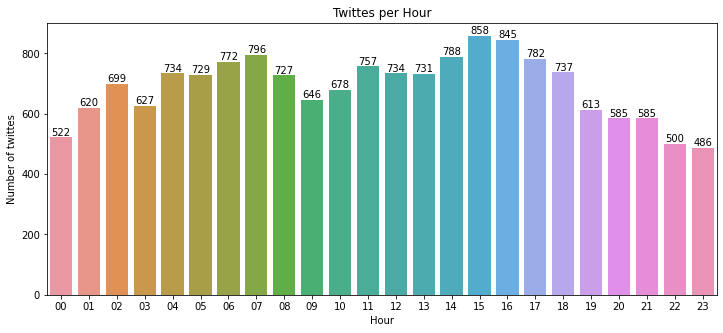

In [47]:
tweets_per_hr = data['hour'].value_counts().sort_index().to_frame(name='Count')
tweets_per_hr['hour']=tweets_per_hr.index


plt.figure(figsize=(12,5))
ax = sb.barplot(x='hour',y='Count',data=tweets_per_hr)
ax.bar_label(ax.containers[0])
plt.ylabel("Number of twittes")
plt.xlabel("Hour")
plt.title("Twittes per Hour")
plt.show()

In [14]:
# Extracting countries which are not having NULL values
location = [loc for loc in data['user_location'] if type(loc)==str]

In [15]:
# Extracting the Countires from user_locations
country_name=[]
for loc in location:
    for country in pycountry.countries:
        if country.name in loc:
            country_name.append(country.name)
country_name

['United States',
 'Mexico',
 'United States',
 'United States',
 'Germany',
 'Greece',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'Canada',
 'Puerto Rico',
 'United States',
 'United States',
 'United States',
 'India',
 'United States',
 'United States',
 'United States',
 'United States',
 'South Africa',
 'United States',
 'South Africa',
 'United States',
 'United States',
 'United States',
 'India',
 'India',
 'Canada',
 'United Kingdom',
 'United States',
 'Switzerland',
 'United States',
 'United States',
 'United Kingdom',
 'Canada',
 'United States',
 'Malaysia',
 'India',
 'Sweden',
 'Niger',
 'Nigeria',
 'Canada',
 'United Kingdom',
 'Canada',
 'India',
 'Canada',
 'Germany',
 'United States',
 'Canada',
 'Mexico',
 'India',
 'Canada',
 'India',
 'United States',
 'India',
 'Denmark',
 'United States',
 'Saudi Arabia',
 'United States',
 'Indonesia',
 'Hong Kong',
 'India',
 'Indonesia',
 'Netherlands',
 'United States',
 'Uni

In [16]:
count = {}
# create a dictionary having count of each countries
for cnt in country_name:
    count[cnt] = count.get(cnt, 0) + 1

# creating dataframe of countries and count
country_df = pd.DataFrame({'Country': list(count.keys()),'Count': list(count.values()),})
# sorting values by count
country_df = country_df.sort_values(by='Count',ascending=False)
country_df = country_df.iloc[:15,]

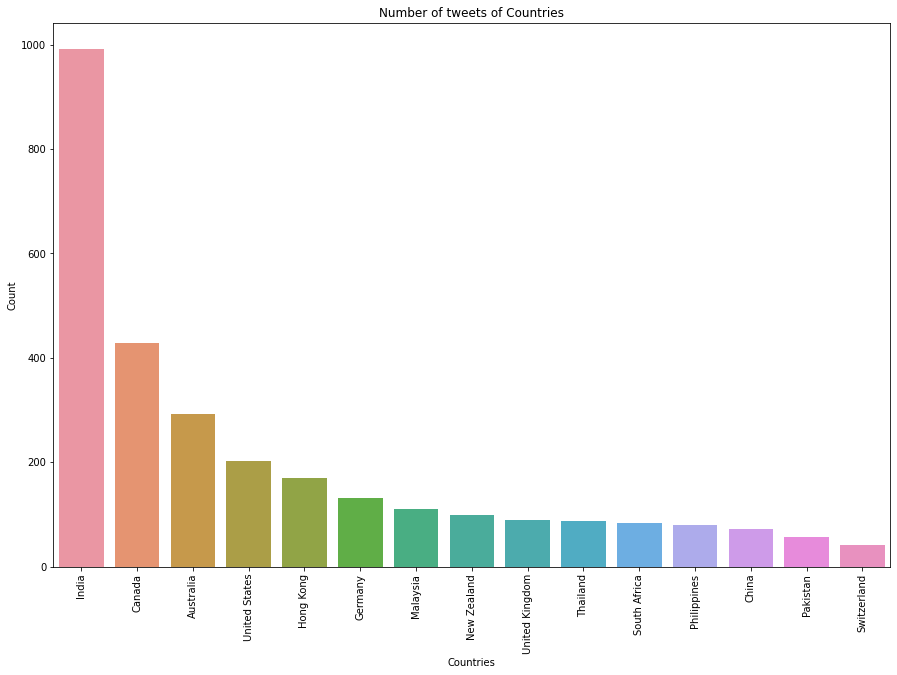

In [17]:
plt.figure(figsize=(15,10))
sb.barplot(x='Country',y='Count',data=country_df)
plt.xticks(rotation=90)
plt.xlabel("Countries")
plt.ylabel("Count")
plt.title("Number of tweets of Countries")
plt.show()

Preprocessing/Data Cleaning

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91983\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91983\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

WordNet: WordNet is a lexical database of the English language. It groups words into sets of synonyms (synsets) and provides short, general definitions. WordNet is often used for tasks like lemmatization and finding word relationships.

In [20]:
# for testing the tweet preprocessing
data1 = data.iloc[0:500,]

In [21]:
data1.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,hashtags,source,retweets,favorites,is_retweet,year,month,DATE,hour,minutes
0,1491840066506743820,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:22:43,...,NaN,smcapplication,0,0,False,2022,02,10,18,22
1,1491839660674490371,Gatherer Thompson,Corporate,I'm with the people who are with everyone. A s...,2009-05-10 23:01:22,639,1931,46369,False,2022-02-10 18:21:06,...,"['CDC', 'vaccinated', 'Omicron', 'hospital']",Twitter Web App,0,0,False,2022,02,10,18,21
2,1491839607368867842,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:20:54,...,NaN,smcapplication,0,0,False,2022,02,10,18,20
3,1491839207169351689,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:19:18,...,NaN,smcapplication,2,1,False,2022,02,10,18,19
4,1491839165608177667,Brownyard Group,"Bay Shore, NY",We offer liability coverage for the Security G...,2009-12-08 16:41:53,375,284,61,False,2022-02-10 18:19:08,...,"['Beijing2022', 'WinterOlympics', 'olympians',...",Agorapulse app,0,0,False,2022,02,10,18,19


In [29]:
stem = PorterStemmer()

In [30]:
def preprocess_tweet_text(tweet):
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub('[^a-zA-Z]',' ', tweet)
    tweet.lower()
    tweet = [WordNetLemmatizer().lemmatize(word) for word in tweet.split(' ')]
    tweet = " ".join(tweet)
    # stopword removal
    tweet = [word for word in tweet.split(' ') if word not in set(stopwords.words('english'))]
    tweet=" ".join(tweet)
    
    return tweet

In [31]:
data['text'] = data['text'].apply(preprocess_tweet_text)

In [32]:
data['text']

0        Daily US Confirmed Covid Cases County For ME  ...
1         Yascha Mounk  CDC say number fully  vaccinate...
2        Daily US Confirmed Covid Cases County For LA  ...
3        Daily US Confirmed Covid Cases County For LA  ...
4        With  Beijing      WinterOlympics already unde...
                               ...                        
17041    As u head back office environment  article cal...
17042    After long time great feeling watch   live int...
17043     NewZealand  LongCovidKids  Masks  ventilation...
17044    Can patient co infected different  variant  Ye...
17045     At  DCYELLOWCAB pay via electronic payment  c...
Name: text, Length: 17046, dtype: object

In [58]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()

In [59]:

data["Positive"] = [SIA.polarity_scores(i)["pos"] for i in data["text"]]
data["Neutral"] = [SIA.polarity_scores(j)["neu"] for j in data["text"]]
data["Negative"] = [SIA.polarity_scores(k)["neg"] for k in data["text"]]

df1 = data[["text", "Positive","Neutral", "Negative"]]
df1.head()


,text,Positive,Neutral,Negative
0,Daily US Confirmed Covid Cases County For ME ...,0.000,1.000,0.0
1,Yascha Mounk CDC say number fully vaccinate...,0.115,0.885,0.0
2,Daily US Confirmed Covid Cases County For LA ...,0.000,1.000,0.0
3,Daily US Confirmed Covid Cases County For LA ...,0.000,1.000,0.0
4,With Beijing WinterOlympics already unde...,0.194,0.806,0.0


In [60]:
sentiments_nltk = []

for tweet in data['text']:
    sentiment_dict = SIA.polarity_scores(tweet)         
    # polarity score returns a dictionary containing sentiment scores for positive, neutral, and negative sentiments, as well as a compound score.
    sentiment_dict.pop('compound', None)
    # removing the compound key from the dictionary
    sentiments_nltk.append(max(sentiment_dict , key=sentiment_dict.get))
    # finds the key with the maximum value in the remaining dictionary, 
    
# print(sentiments_nltk)
    
data['Tweet_type'] = sentiments_nltk
data['Tweet_type'].value_counts()

neu    16058
pos      275
neg      218
Name: Tweet_type, dtype: int64

In [61]:
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,year,month,DATE,hour,minutes,word_count,Positive,Neutral,Negative,Tweet_type
0,1491840066506743820,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:22:43,...,2022,02,10,18,22,15,0.000,1.000,0.0,neu
1,1491839660674490371,Gatherer Thompson,Corporate,I'm with the people who are with everyone. A s...,2009-05-10 23:01:22,639,1931,46369,False,2022-02-10 18:21:06,...,2022,02,10,18,21,11,0.115,0.885,0.0,neu
2,1491839607368867842,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:20:54,...,2022,02,10,18,20,15,0.000,1.000,0.0,neu
3,1491839207169351689,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:19:18,...,2022,02,10,18,19,15,0.000,1.000,0.0,neu
4,1491839165608177667,Brownyard Group,"Bay Shore, NY",We offer liability coverage for the Security G...,2009-12-08 16:41:53,375,284,61,False,2022-02-10 18:19:08,...,2022,02,10,18,19,13,0.194,0.806,0.0,neu


In [62]:
df = {'Tweet_type':['neu','pos','neg'],'count':[16058,275,218]}
df = pd.DataFrame(df)
df


,Tweet_type,count
0,neu,16058
1,pos,275
2,neg,218


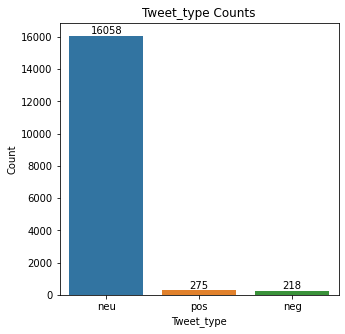

In [63]:
plt.figure(figsize=(5,5))
ax = sb.barplot(x='Tweet_type',y='count',data=df)
ax.bar_label(ax.containers[0])
plt.title('Tweet_type Counts')
plt.xlabel('Tweet_type')
plt.ylabel('Count')
plt.show()

Model Creation

In [68]:
# Processing data for model
data['Tweet_type'].replace({'neu':1,'pos':2,'neg':0},inplace=True)
data['Tweet_type'].value_counts()

1    16058
2      275
0      218
Name: Tweet_type, dtype: int64

In [71]:
x = data['text'].values
y = data['Tweet_type'].values

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.2)

In [73]:
vectorizer = TfidfVectorizer()

x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [77]:
print(x_train)

  (0, 14545)	0.3458119323623194
  (0, 13524)	0.22785956726966702
  (0, 508)	0.2079501816658733
  (0, 9826)	0.20491149443146622
  (0, 5302)	0.20609147469408476
  (0, 6802)	0.20694612173117358
  (0, 3319)	0.490769827915259
  (0, 5176)	0.20441155592913057
  (0, 2916)	0.2077760820179907
  (0, 10487)	0.258426942682316
  (0, 10170)	0.27172646619724694
  (0, 3344)	0.2610443698723796
  (0, 2938)	0.2533188912733237
  (0, 3310)	0.24334614007845262
  (1, 4247)	0.3788397335096847
  (1, 13079)	0.27266017444743285
  (1, 2927)	0.25033102847790256
  (1, 12019)	0.2500275244160115
  (1, 9650)	0.08309925909636598
  (1, 3453)	0.21417830281149336
  (1, 3575)	0.3788397335096847
  (1, 13610)	0.22924482002896868
  (1, 614)	0.3340382061639076
  (1, 11098)	0.2929523193124015
  (1, 2552)	0.31680446465182976
  :	:
  (13238, 9570)	0.3654915930087099
  (13238, 2960)	0.30286306335193475
  (13238, 893)	0.29576833112366857
  (13238, 5996)	0.29799255325032115
  (13238, 15119)	0.31864104605742133
  (13238, 4124)	0.26989

In [74]:
lg_reger = LogisticRegression()
lg_reger.fit(x_train,y_train)

LogisticRegression()

In [75]:
x_test_pred = lg_reger.predict(x_test)
accuracy1 = accuracy_score(y_test,x_test_pred)
print(accuracy1*100)

97.79522802778617


Logistic Regression Model Accuracy : 97.79%

In [83]:
rf = RandomForestClassifier(max_samples=0.9,random_state=42)

In [84]:
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)*100

98.03684687405617

Random Forest Model Accuracy : 98.036%